# West Nile Virus Prediction (Course Project)

Given weather, location, testing, and spraying data, this project asks you to predict when and where different species of mosquitos will test positive for West Nile virus.

### Downloading the Data

We'll use the [`opendatasets` library](https://github.com/JovianML/opendatasets) to download the data from Kaggle directly within Jupyter. Let's install and import `opendatasets`.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
od.version()

'0.1.20'

The dataset can now be downloaded using `od.download`. When you execute `od.download`, you will be asked to provide your Kaggle username and API key. Follow these instructions to create an API key: http://bit.ly/kaggle-creds

In [4]:
dataset_url = 'https://www.kaggle.com/c/predict-west-nile-virus/data'

In [5]:
od.download(dataset_url)

Skipping, found downloaded files in "./predict-west-nile-virus" (use force=True to force download)


Once the above command is executed, the dataset is downloaded and extracted to the the directory `weather-dataset-rattle-package`.

In [6]:
import os

In [7]:
data_dir = './predict-west-nile-virus'

In [8]:
os.listdir(data_dir)

['mapdata_copyright_openstreetmap_contributors.txt.zip',
 'test.csv.zip',
 'weather.csv.zip',
 'noaa_weather_qclcd_documentation.pdf',
 'mapdata_copyright_openstreetmap_contributors.rds',
 'spray.csv.zip',
 'train.csv.zip',
 'sampleSubmission.csv.zip',
 'west_nile.zip']

In [9]:
train_csv = data_dir + '/train.csv.zip'
weather_csv = data_dir + '/weather.csv.zip'
spray_csv = data_dir + '/spray.csv.zip'
test_csv = data_dir + '/test.csv.zip'
submission_csv = data_dir + '/sampleSubmission.csv.zip'


Let's load the data using Pandas.

In [10]:
!pip install pandas --quiet

In [11]:
import pandas as pd

In [12]:
train_df = pd.read_csv(train_csv)
weather_df = pd.read_csv(weather_csv)
spray_df = pd.read_csv(spray_csv)
test_df = pd.read_csv(test_csv)
submission_df = pd.read_csv(submission_csv)

In [13]:
train_df

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10501,2013-09-26,"5100 West 72nd Street, Chicago, IL 60638, USA",CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,"5100 W 72ND ST, Chicago, IL",41.763733,-87.742302,8,6,1
10502,2013-09-26,"5800 North Ridge Avenue, Chicago, IL 60660, USA",CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,"5800 N RIDGE AVE, Chicago, IL",41.987280,-87.666066,8,5,0
10503,2013-09-26,"1700 North Ashland Avenue, Chicago, IL 60622, USA",CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,"1700 N ASHLAND AVE, Chicago, IL",41.912563,-87.668055,9,1,0
10504,2013-09-26,"7100 North Harlem Avenue, Chicago, IL 60631, USA",CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,"7100 N HARLEM AVE, Chicago, IL",42.009876,-87.807277,9,5,0


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 9.8+ MB


### Plotting the traps on the map by using plotly+mapbox
* To run this notebook, one needs to register for a free account at https://mapbox.com/ and obtain a Mapbox Access token.
* Paste the access token into the MAPBOX_TOKEN variable below.

In [15]:
import plotly.express as px
MAPBOX_TOKEN = ''
px.set_mapbox_access_token(MAPBOX_TOKEN)
fig = px.scatter_mapbox(train_df, lat = 'Latitude', lon  = 'Longitude', size_max=15, zoom = 10)

fig.update_layout(title = 'Satellite Traps',
    autosize=False,
    width=600,
    height=600,)

fig.show()

In [16]:
# total number of mosquitos in perticular area divided based on Address 
total_mosquito = train_df.groupby(['Address'], as_index = False)[['NumMosquitos']].sum()

# grouping areas based on 'Latitude'and 'Longitude' of the Address
areas = train_df.groupby(['Address'], as_index = False)[['Latitude','Longitude']].median()

# Number of virus found in these areas
virus = train_df.groupby(['Address'], as_index = False)[['WnvPresent']].sum() 

# creating a dataframe with total_mosquito, areas, virus as columns
exploratory_data = pd.concat([total_mosquito,areas, virus], axis = 1)

exploratory_data.drop('Address', axis = 1, inplace = True)
exploratory_data

,NumMosquitos,Latitude,Longitude,WnvPresent
0,852,41.773215,-87.600880,4
1,1802,41.899230,-87.716788,8
2,125,41.869107,-87.696293,0
3,185,41.721474,-87.648064,1
4,666,41.903002,-87.688267,4
...,...,...,...,...
133,374,41.723195,-87.649970,4
134,28,41.753411,-87.639817,0
135,1685,41.868077,-87.666901,7
136,47,41.825902,-87.667827,0


In [17]:
fig = px.scatter_mapbox(exploratory_data, lat = 'Latitude', lon  = 'Longitude', 
                        color = 'NumMosquitos', size = 'WnvPresent', 
                        color_continuous_scale=px.colors.sequential.Jet,
                        hover_data = ['NumMosquitos', 'WnvPresent'], zoom = 9)
fig.update_layout(title = 'No. of virus Vs mosquitos',
    autosize=False,
    width=600,
    height=600,)

fig.show()

It can be seen that there are two locations having higher mosquito count (represented by color map) and same location also have higher WN virus count(represented by size of the marker).

Hover on top of them for more details.
Orange region have mosquito count = 15386 and WN virus count = 66
brown region have mosquito count = 21668 and WN virus count = 41

* Here we can observed that having higher mosquito count need not to have higher WN virus count
* So Percentage of WN Virus count in the mosquito count can be a good indicater to observe the Virus in different locations

In [18]:
# Percentage of WN Virus in various location
exploratory_data['Virus%'] = exploratory_data['WnvPresent']/exploratory_data['NumMosquitos']

In [19]:
fig = px.scatter_mapbox(exploratory_data, lat = 'Latitude', lon  = 'Longitude',
                        size = 'Virus%', zoom = 9)

fig.update_layout(title = 'Percentage of Virus in different locations',
    autosize=False,
    width=600,
    height=600,)

fig.show()

### Preprocessing the spray data

In [20]:
spray_df

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858
...,...,...,...,...
14830,2013-09-05,8:34:11 PM,42.006587,-87.812355
14831,2013-09-05,8:35:01 PM,42.006192,-87.816015
14832,2013-09-05,8:35:21 PM,42.006022,-87.817392
14833,2013-09-05,8:35:31 PM,42.005453,-87.817423


Effectiveness of spray on WN Virus

In [21]:
fig = px.scatter_mapbox(spray_df, lat = 'Latitude', lon  = 'Longitude',
                        size_max=15, zoom = 9,color_discrete_sequence=['#FECB52'],  opacity = 0.5)

fig2 = px.scatter_mapbox(exploratory_data, lat = 'Latitude', lon  = 'Longitude', 
                        color = 'NumMosquitos', size = 'WnvPresent', 
                        color_continuous_scale=px.colors.sequential.Jet,
                        hover_data = ['NumMosquitos', 'WnvPresent'], zoom = 9)

fig.add_trace(fig2.data[0],)

fig.update_layout( title = 'Spray - West Nile Virus and Mosquito clusters',
                width=600,
    height=600,
)

Areas that were sprayed, have low virus count which indicate that spraying is effective but some crucial areas were not sprayed which leads to have higher virus count in that area

In [22]:
fig = px.scatter_mapbox(spray_df, lat = 'Latitude', lon  = 'Longitude',
                        size_max=15, zoom = 9,color_discrete_sequence=['#FECB52'],  opacity = 0.5)

fig2 = px.scatter_mapbox(exploratory_data, lat = 'Latitude', lon  = 'Longitude',
                        size = 'Virus%', zoom = 9)

fig.add_trace(fig2.data[0],)

fig.update_layout( title = 'Spray Vs Virus%',
                width=600,
                height=600,
)

spraying reduces both mosquito count and virus count but virus% is high in the sprayed area, which may be due to fact that spray is more effective on other mosquito than the one who spread WN virus

### Preprocessing the weather data

In [23]:
weather_df

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [24]:
weather_df['Tavg'].unique()

array(['67', '68', '51', '52', '56', '58', 'M', '60', '59', '65', '70',
       '69', '71', '61', '55', '57', '73', '72', '53', '62', '63', '74',
       '75', '78', '76', '77', '66', '80', '64', '81', '82', '79', '85',
       '84', '83', '50', '49', '46', '48', '45', '54', '47', '44', '40',
       '41', '38', '39', '42', '37', '43', '86', '87', '89', '92', '88',
       '91', '93', '94', '90', '36'], dtype=object)

There are rows in 'Tavg' with 'M' as values 

In [25]:
# count the number of rows having 'M' as a value in 'Tavg' column
weather_df[weather_df['Tavg']=='M']

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
7,2,2007-05-04,78,51,M,M,42,50,M,M,-,-,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
505,2,2008-07-08,86,46,M,M,68,71,M,M,-,-,TS RA,M,M,M,0.28,29.16,29.80,7.4,24,8.3
675,2,2008-10-01,62,46,M,M,41,47,M,M,-,-,,M,M,M,0.00,29.30,29.96,10.9,33,11.0
1637,2,2011-07-22,100,71,M,M,70,74,M,M,-,-,TS TSRA BR,M,M,M,0.14,29.23,29.86,3.8,10,8.2
2067,2,2012-08-22,84,72,M,M,51,61,M,M,-,-,,M,M,M,0.00,29.39,M,4.7,19,M
2211,2,2013-05-02,71,42,M,M,39,45,M,M,-,-,,M,M,M,0.00,29.51,30.17,15.8,2,16.1
2501,2,2013-09-24,91,52,M,M,48,54,M,M,-,-,,M,M,M,0.00,29.33,30.00,5.8,9,7.7
2511,2,2013-09-29,84,53,M,M,48,54,M,M,-,-,RA BR,M,M,M,0.22,29.36,30.01,6.3,36,7.8
2525,2,2013-10-06,76,48,M,M,44,50,M,M,-,-,RA DZ BR,M,M,M,0.06,29.10,29.76,10.1,25,10.6
2579,2,2014-05-02,80,47,M,M,43,47,M,M,-,-,RA,M,M,M,0.04,29.10,29.79,10.7,23,11.9


only 11 rows of 'Tavg' have 'M' as value so remove these rows for further analysis

In [26]:
weather_df.drop(weather_df[weather_df['Tavg']=='M'].index, axis = 0, inplace = True)
weather_df.reset_index(drop = True)
weather_df

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,-,-,,M,M,M,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,0622,1649,,0,M,0.0,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45,M,35,42,20,0,-,-,RA,M,M,M,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,0623,1647,RA SN,0,M,0.1,0.03,29.49,30.20,22.6,34,22.9


In [27]:
# Grouping 'Tavg' with 'Date'
weather_df['Tavg'] = weather_df['Tavg'].astype(int) 
weather = weather_df.groupby(['Date'], as_index = False)[['Tavg']].mean()
weather

,Date,Tavg
0,2007-05-01,67.5
1,2007-05-02,51.5
2,2007-05-03,57.0
3,2007-05-04,58.0
4,2007-05-05,60.0
...,...,...
1467,2014-10-27,65.5
1468,2014-10-28,57.0
1469,2014-10-29,44.0
1470,2014-10-30,43.5


1) Tavg Vs Mosquito count and Virus count on different dates

In [28]:
# Merging 'NumMosquitos' and 'WnvPresent' to the 'Tavg' with respect to Date
dw_mosquitos = train_df.groupby(['Date'], as_index = False)[['NumMosquitos']].sum()
dw_virus = train_df.groupby(['Date'], as_index = False)[['WnvPresent']].sum()

dw_wnv_mosquitos = pd.merge(dw_mosquitos, dw_virus, on = 'Date')
weather_1 = pd.merge(dw_wnv_mosquitos, weather)

In [29]:
weather_1

,Date,NumMosquitos,WnvPresent,Tavg
0,2007-05-29,40,0,75.5
1,2007-06-05,127,0,56.5
2,2007-06-26,216,0,81.5
3,2007-06-29,85,0,63.5
4,2007-07-02,240,0,67.0
...,...,...,...,...
90,2013-08-29,2645,38,78.0
91,2013-09-06,2510,32,73.0
92,2013-09-12,2210,23,72.5
93,2013-09-19,1030,11,77.0


In [30]:
fig = px.scatter(weather_1, x="Tavg", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 65, x1= 65
    )
],
    title="Mosquitos vs Average temperature",
    xaxis_title="Average Temperature in Fahrenheit",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

Number of mosquitos and virus count have significantly high values for Tavg > 65 

In [31]:
# replace some missing values and T with -1
weather_df = weather_df.replace('M', 0)
weather_df = weather_df.replace('-', 0)
weather_df = weather_df.replace('T', 0)
weather_df = weather_df.replace(' T', 0)
weather_df = weather_df.replace('  T', 0)

In [32]:
weather_df['DewPoint'].unique()

array([51, 42, 40, 41, 38, 39, 30, 58, 57, 59, 60, 52, 44, 36, 37, 33, 32,
       47, 45, 56, 43, 31, 50, 46, 49, 48, 54, 53, 55, 61, 63, 62, 64, 65,
       66, 67, 69, 70, 68, 71, 72, 73, 35, 34, 29, 27, 28, 23, 24, 25, 22,
       26, 75, 74])

In [33]:
weather_df['WetBulb'].unique()
weather_df['WetBulb'] = weather_df['WetBulb'].astype(int) 

In [34]:
weather_df['AvgSpeed'].unique()
weather_df['AvgSpeed'] = weather_df['AvgSpeed'].astype(float) 

In [35]:
weather_df['Heat'].unique()
weather_df['Heat'] = weather_df['Heat'].astype(int) 

In [36]:
weather_df['Cool'].unique()
weather_df['Cool'] = weather_df['Cool'].astype(int) 

In [37]:
# Grouping 'DewPoint', 'WetBulb', 'AvgSpeed','Heat', 'Cool' with 'Date'
#weather_df['Tavg'] = weather_df['Tavg'].astype(int) 
weather_feature = weather_df.groupby(['Date'], as_index = False)[['Tavg','DewPoint', 'WetBulb', 'AvgSpeed','Heat', 'Cool']].mean()
weather_feature

,Date,Tavg,DewPoint,WetBulb,AvgSpeed,Heat,Cool
0,2007-05-01,67.5,51.0,56.5,9.40,0.0,2.5
1,2007-05-02,51.5,42.0,47.0,13.40,13.5,0.0
2,2007-05-03,57.0,40.0,49.0,12.55,8.0,0.0
3,2007-05-04,58.0,41.0,50.0,10.80,7.0,0.0
4,2007-05-05,60.0,38.5,49.5,11.75,5.0,0.0
...,...,...,...,...,...,...,...
1467,2014-10-27,65.5,51.5,58.5,13.25,0.5,1.0
1468,2014-10-28,57.0,39.0,47.5,15.10,8.0,0.0
1469,2014-10-29,44.0,33.0,41.0,9.45,21.0,0.0
1470,2014-10-30,43.5,34.5,41.0,6.00,21.5,0.0


In [38]:
weather_2 = pd.merge(dw_wnv_mosquitos, weather_feature)
weather_2

,Date,NumMosquitos,WnvPresent,Tavg,DewPoint,WetBulb,AvgSpeed,Heat,Cool
0,2007-05-29,40,0,75.5,58.5,65.5,6.95,0.0,10.5
1,2007-06-05,127,0,56.5,47.5,51.5,7.85,8.5,0.0
2,2007-06-26,216,0,81.5,69.0,72.0,7.60,0.0,16.5
3,2007-06-29,85,0,63.5,55.5,59.5,8.25,1.5,0.0
4,2007-07-02,240,0,67.0,50.0,58.5,8.30,0.0,2.0
...,...,...,...,...,...,...,...,...,...
90,2013-08-29,2645,38,78.0,64.5,69.0,4.65,0.0,13.0
91,2013-09-06,2510,32,73.0,56.5,63.5,6.00,0.0,8.0
92,2013-09-12,2210,23,72.5,58.5,64.0,9.60,0.0,7.5
93,2013-09-19,1030,11,77.0,67.0,69.5,10.30,0.0,12.0


Analysing Dewpoint

In [39]:
fig = px.scatter(weather_2, x="DewPoint", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 51, x1= 51
    )
],
    title="Mosquitos vs DewPoint",
    xaxis_title="DewPoint",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

Number of mosquitos and virus count have significantly high values for DewPoint > 51 

Analysing WetBulb

In [40]:
fig = px.scatter(weather_2, x="WetBulb", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 57, x1= 57
    )
],
    title="Mosquitos vs WetBulb",
    xaxis_title="WetBulb",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

Number of mosquitos and virus count have significantly high values for WetBulb > 57

Analysing Average Speed

In [41]:
fig = px.scatter(weather_2, x="AvgSpeed", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(shapes=[
    dict(
      type= 'line',
      yref= 'paper', y0= 0, y1= 1,
      xref= 'x', x0= 10.5, x1= 10.5
    )
],
    title="Mosquitos vs AvgSpeed",
    xaxis_title="AvgSpeed",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

Number of mosquitos and virus count have significantly high values for AvgSpeed < 10.5

Analysing Heat

In [42]:
fig = px.scatter(weather_2, x="Heat", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(
    title="Mosquitos vs Heat",
    xaxis_title="Heat",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

Mostly Heat has 0 value and it does not give any relation with virus count and number of mosquitos, So its better to drop Heat feature from the dataset for building the final model

Analysing Cool

In [43]:
fig = px.scatter(weather_2, x="Cool", y="NumMosquitos",
                 size='WnvPresent')

fig.update_layout(
    title="Mosquitos vs Cool",
    xaxis_title="Cool",
    yaxis_title="Number of Mosquitos",
    width=700,
    height=500,)
fig.show()

There are considerable number of mosquitos and virus count for intire spectrum of Cool, So it can also be droped from final model

### Cleaning weather data

Assumption on how weather affects mosquito activity:
* Rainfall = Mosquito Breeding (mosquitoes lay their eggs in standing water)
* Summer = Mosquito Biting (Mosquitoes are active in warm climates, Warm weather also means a greater chance of infection.)
* Winter = Mosquito Disappearance (Since mosquitoes are cold-blooded, they basically shut down when temperatures drop to a certain degrees.



In [44]:
# Selecting 'Date','Tavg', 'DewPoint'and 'AvgSpeed'
weather_data = weather_feature.copy()
weather_data

,Date,Tavg,DewPoint,WetBulb,AvgSpeed,Heat,Cool
0,2007-05-01,67.5,51.0,56.5,9.40,0.0,2.5
1,2007-05-02,51.5,42.0,47.0,13.40,13.5,0.0
2,2007-05-03,57.0,40.0,49.0,12.55,8.0,0.0
3,2007-05-04,58.0,41.0,50.0,10.80,7.0,0.0
4,2007-05-05,60.0,38.5,49.5,11.75,5.0,0.0
...,...,...,...,...,...,...,...
1467,2014-10-27,65.5,51.5,58.5,13.25,0.5,1.0
1468,2014-10-28,57.0,39.0,47.5,15.10,8.0,0.0
1469,2014-10-29,44.0,33.0,41.0,9.45,21.0,0.0
1470,2014-10-30,43.5,34.5,41.0,6.00,21.5,0.0


* Coding dummy variables for is_hot (1 for hot, 0 for not hot) , is_dry (1 for dry, 0 for wet), is_windy (1 for windy, 0 for not windy)
* dewpoint < 51 & wetbulb < 57 is dry, > 51 & > 57 is wet
* temperature < 65 is cold, >65 is hot
* AvgSpeed < 10.5 is not windy, >10.5 is windy

In [45]:
#Coding dummy variables for is_hot (1 for hot, 0 for not hot) , is_dry (1 for dry, 0 for wet), is_windy (1 for windy, 0 for not windy)
#dewpoint < 51 & wetbulb < 57 is dry, > 51 & > 57 is wet
#temperature < 65 is cold, >65 is hot
#AvgSpeed < 10.5 is not windy, >10.5 is windy
hot = []
dry = []
windy = []

for c in weather_data['Tavg']:
    if c > 65:
        hot.append(1)
    else:
        hot.append(0)
        
for i in range(len(weather_data['DewPoint'])):
    if weather_data['DewPoint'][i] > 51 and weather_data['WetBulb'][i] > 57:
        dry.append(0)
    else:
        dry.append(1)

for j in weather_data['AvgSpeed']:
    if j > 10.5:
        windy.append(1)
    else:
        windy.append(0)
        
weather_data['is_hot'] = hot
weather_data['is_dry'] = dry
weather_data['is_windy'] = windy

final_weather_data = weather_data.drop(['Tavg', 'DewPoint','WetBulb','AvgSpeed'], axis=1).reset_index(drop=True)

We will use final_weather_data as our weather data to train our model

In [46]:
final_weather_data

,Date,Heat,Cool,is_hot,is_dry,is_windy
0,2007-05-01,0.0,2.5,1,1,0
1,2007-05-02,13.5,0.0,0,1,1
2,2007-05-03,8.0,0.0,0,1,1
3,2007-05-04,7.0,0.0,0,1,1
4,2007-05-05,5.0,0.0,0,1,1
...,...,...,...,...,...,...
1467,2014-10-27,0.5,1.0,1,0,1
1468,2014-10-28,8.0,0.0,0,1,1
1469,2014-10-29,21.0,0.0,0,1,0
1470,2014-10-30,21.5,0.0,0,1,0


Merging the weather data with the train and test data

In [47]:
# Merging final_weather_data to train_df and test_df
train_df = train_df.merge(final_weather_data, how='left', on='Date')
test_df = test_df.merge(final_weather_data, how='left', on='Date')

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116293 entries, 0 to 116292
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Id                      116293 non-null  int64  
 1   Date                    116293 non-null  object 
 2   Address                 116293 non-null  object 
 3   Species                 116293 non-null  object 
 4   Block                   116293 non-null  int64  
 5   Street                  116293 non-null  object 
 6   Trap                    116293 non-null  object 
 7   AddressNumberAndStreet  116293 non-null  object 
 8   Latitude                116293 non-null  float64
 9   Longitude               116293 non-null  float64
 10  AddressAccuracy         116293 non-null  int64  
 11  Heat                    116293 non-null  float64
 12  Cool                    116293 non-null  float64
 13  is_hot                  116293 non-null  int64  
 14  is_dry              

### Exploratory Data Analysis and Visualization of train data

Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. 

Virus Vs Species

In [49]:
species_virus = train_df[['Species', 'WnvPresent']].groupby('Species', as_index = False).sum()

In [50]:
fig = px.bar(species_virus, x = 'Species', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Species",
    xaxis_title="Species",
    yaxis_title="Virus",
    width=700,
    height=500,)
fig.show()

Culex pipiens, culex pipiens/restuans and culex restuans causes west nile virus but first two contributes the most

Spliting date into 3 dummy features 'Year', 'Month','Day'

In [51]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day

In [52]:
split_date(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10506 entries, 0 to 10505
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    10506 non-null  datetime64[ns]
 1   Address                 10506 non-null  object        
 2   Species                 10506 non-null  object        
 3   Block                   10506 non-null  int64         
 4   Street                  10506 non-null  object        
 5   Trap                    10506 non-null  object        
 6   AddressNumberAndStreet  10506 non-null  object        
 7   Latitude                10506 non-null  float64       
 8   Longitude               10506 non-null  float64       
 9   AddressAccuracy         10506 non-null  int64         
 10  NumMosquitos            10506 non-null  int64         
 11  WnvPresent              10506 non-null  int64         
 12  Heat                    10506 non-null  float6

Virus Vs Year

In [53]:
Year_virus = train_df[['Year', 'WnvPresent']].groupby('Year', as_index = False).sum()

In [54]:
fig = px.bar(Year_virus, x = 'Year', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Year",
    xaxis_title="Year",
    yaxis_title="Virus",
    width=700,
    height=500,)
fig.show()

2007 and 2013 have the higher virus counts

Virus Vs Month

In [55]:
month_virus = train_df[['Month', 'WnvPresent']].groupby('Month', as_index = False).sum()

In [56]:
fig = px.bar(month_virus, x = 'Month', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Month",
    xaxis_title="Month",
    yaxis_title="Virus",
    width=700,
    height=500,)
fig.show()

* It shows the WN Virus mostly spead in the month of July, August, September
* Also August is the peak month of the year for Virus spread

Virus Vs Day

In [57]:
day_virus = train_df[['Day', 'WnvPresent']].groupby('Day', as_index = False).sum()

In [58]:
fig = px.bar(day_virus, x = 'Day', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Day",
    xaxis_title="Day",
    yaxis_title="Virus",
    width=700,
    height=500,)
fig.show()

Virus Vs Block

In [59]:
block_virus = train_df[['Block', 'WnvPresent']].groupby('Block', as_index = False).sum()

In [60]:
fig = px.bar(block_virus, x = 'Block', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Block",
    xaxis_title="Block",
    yaxis_title="Virus",
    width=600,
    height=500,)
fig.show()

Virus Vs Trap

In [61]:
trap_df = train_df[['Trap', 'WnvPresent']].groupby('Trap', as_index = False).sum()

In [62]:
fig = px.bar(trap_df, x = 'Trap', y = 'WnvPresent')
fig.update_layout(
    title="Virus vs Trap",
    xaxis_title="Trap",
    yaxis_title="Virus",
    width=600,
    height=500,)
fig.show()

### Identifying Input and Target Columns

In [63]:
train_df.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'Heat', 'Cool', 'is_hot', 'is_dry',
       'is_windy', 'Year', 'Month', 'Day'],
      dtype='object')

In [64]:
split_date(test_df)
test_df.columns

Index(['Id', 'Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'Heat', 'Cool', 'is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day'],
      dtype='object')

In [65]:
# input and target columns for building the final model
input_col = ['Species', 'Block', 'Street', 'Trap','Latitude', 'Longitude','AddressAccuracy','is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day']
target_col = ['WnvPresent']

In [66]:
# inputs and targets from the train data set
inputs = train_df[input_col].copy()
targets = train_df[target_col].copy()

In [67]:
# inputs from the test data set, we will use this after building our final model
X_test = test_df[input_col].copy()

In [68]:
inputs

,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,is_hot,is_dry,is_windy,Year,Month,Day
0,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,0,2007,5,29
1,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,9,1,0,0,2007,5,29
2,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,9,1,0,0,2007,5,29
3,CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0,0,2007,5,29
4,CULEX RESTUANS,79,W FOSTER AVE,T015,41.974089,-87.824812,8,1,0,0,2007,5,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,CULEX PIPIENS/RESTUANS,51,W 72ND ST,T035,41.763733,-87.742302,8,0,0,0,2013,9,26
10502,CULEX PIPIENS/RESTUANS,58,N RIDGE AVE,T231,41.987280,-87.666066,8,0,0,0,2013,9,26
10503,CULEX PIPIENS/RESTUANS,17,N ASHLAND AVE,T232,41.912563,-87.668055,9,0,0,0,2013,9,26
10504,CULEX PIPIENS/RESTUANS,71,N HARLEM AVE,T233,42.009876,-87.807277,9,0,0,0,2013,9,26


In [69]:
targets

,WnvPresent
0,0
1,0
2,0
3,0
4,0
...,...
10501,1
10502,0
10503,0
10504,0


### Assign numeric values to categorial features

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.

In [70]:
numeric_cols = ['Block','Latitude', 'Longitude','AddressAccuracy','is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day']
categorical_cols = ['Species', 'Street', 'Trap']

In [71]:
# Unique elements in the 'Trap' column
len(inputs["Trap"].unique())

136

In [72]:
# Unique elements in the 'Street' column
len(inputs["Street"].unique())

128

In [73]:
# Unique elements in the 'Species' column
len(inputs["Species"].unique())

7

There are 136 and 128 unique elements in Trap and Street columns, So its not a idea to use one-hot encoder because it leads to (136 + 128) new features in the data set. 

We can go with LabelEncoder for Trap and Street columns but for Species we can go with one-hot encoder, So that we can observe the relation between the virus and species

In [74]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

lb = LabelEncoder()

# encoding Street
lb.fit(list(inputs['Street'].values))
inputs['Street'] = lb.transform(inputs['Street'].values)

lb.fit(list(X_test['Street'].values))
X_test['Street'] = lb.transform(X_test['Street'].values)

# encoding Trap
lb.fit(list(inputs['Trap'].values))
inputs['Trap'] = lb.transform(inputs['Trap'].values)

lb.fit(list(X_test['Trap'].values))
X_test['Trap'] = lb.transform(X_test['Trap'].values)

# encoding Species
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[['Species']])
encoded_cols = list(encoder.get_feature_names(['Species']))
inputs[encoded_cols] = encoder.transform(inputs[['Species']])

X_test[encoded_cols] = encoder.transform(X_test[['Species']])


In [75]:
# Droping Species column from inputs and X_test data set
inputs = inputs.drop(['Species'], axis = 1)
X_test = X_test.drop(['Species'], axis = 1)

In [76]:
X_test.columns


Index(['Block', 'Street', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS'],
      dtype='object')

In [77]:
inputs.columns


Index(['Block', 'Street', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS'],
      dtype='object')

### Scale Numeric Values

Let's scale numeric values to the 0 to 1 range.

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

Columns to be scaled

In [80]:
scale_cols = ['Block', 'Street', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy', 'Year', 'Month', 'Day']
scaler.fit(inputs[scale_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [81]:
inputs[scale_cols] = scaler.transform(inputs[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

In [82]:
X_test.head()

,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,is_hot,is_dry,is_windy,Year,Month,Day,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
0,0.352273,0.283465,0.007407,0.831714,0.325531,1.0,1,0,0,0.166667,0.2,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.352273,0.283465,0.007407,0.831714,0.325531,1.0,1,0,0,0.166667,0.2,0.333333,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.352273,0.283465,0.007407,0.831714,0.325531,1.0,1,0,0,0.166667,0.2,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.352273,0.283465,0.007407,0.831714,0.325531,1.0,1,0,0,0.166667,0.2,0.333333,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.352273,0.283465,0.007407,0.831714,0.325531,1.0,1,0,0,0.166667,0.2,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique. 


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.

In this data set we already have test data, So we use 75%-25% training-validation split


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`.



In [83]:
from sklearn.model_selection import train_test_split

In [84]:
final_data = inputs.copy()
final_data['target'] = targets
final_data.head()

,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,is_hot,is_dry,is_windy,Year,Month,Day,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,target
0,0.352273,0.251969,0.007407,0.831714,0.325531,1.000000,1,0,0,0.0,0.0,0.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,0.352273,0.251969,0.007407,0.831714,0.325531,1.000000,1,0,0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.590909,0.212598,0.044444,0.939812,0.404938,1.000000,1,0,0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
3,0.784091,0.858268,0.096296,0.883748,0.265883,0.833333,1,0,0,0.0,0.0,0.933333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,0.784091,0.858268,0.096296,0.883748,0.265883,0.833333,1,0,0,0.0,0.0,0.933333,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [85]:
  tra_df, val_df = train_test_split(final_data, test_size=0.25, random_state=42, shuffle = True)


## Logistic Regression Classifier Model1
Input columns for training the model1

In [86]:
# input and target columns for building the model1
in_col1 = ['Block', 'Street', 'Trap','Latitude', 'Longitude','AddressAccuracy','is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day', 'Species_CULEX ERRATICUS', 
             'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS','Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS']
out_col1 = ['target']

In [87]:
# training input and target data set
tra_inputs1 = tra_df[in_col1].copy()
tra_targets1 = tra_df[out_col1].copy()

In [88]:
# validation input and target data set
val_inputs1 = val_df[in_col1].copy()
val_targets1 = val_df[out_col1].copy()

We can now verify that values in each column lie in the range $(0,1)$

In [89]:
tra_inputs1.describe()

,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,is_hot,is_dry,is_windy,Year,Month,Day,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
count,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000,7879.000000
mean,0.292596,0.502567,0.533860,0.526888,0.578911,0.802809,0.830181,0.172230,0.101028,0.430342,0.542023,0.479816,0.000127,0.260058,0.447519,0.262724,0.008123,0.000635,0.020815
std,0.277736,0.292578,0.299488,0.303316,0.241400,0.242709,0.375497,0.377604,0.301385,0.392155,0.212719,0.296532,0.011266,0.438694,0.497270,0.440142,0.089766,0.025185,0.142773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022727,0.251969,0.266667,0.237038,0.427997,0.833333,1.000000,0.000000,0.000000,0.000000,0.400000,0.233333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.261364,0.464567,0.585185,0.540379,0.590956,0.833333,1.000000,0.000000,0.000000,0.333333,0.600000,0.466667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.477273,0.740157,0.785185,0.831714,0.759212,1.000000,1.000000,0.000000,0.000000,0.666667,0.600000,0.766667,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training a Logistic Regression Model1

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model1 = LogisticRegression(solver='liblinear',random_state = 42)
model1.fit(tra_inputs1, tra_targets1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let's check the weights and biases of the trained model.

In [92]:
print(model1.coef_.tolist())

[[-0.09823300182908236, -0.5307526788794624, -0.15107932498050894, -0.555203259583515, -2.30402370778063, -0.5927289608012987, 1.2980938400112647, -1.119951296177887, -0.809977809009014, 0.6985149653637437, 2.2690846711846193, 0.5508931100303055, -0.15032862479771897, 0.49051414875462745, 0.026256731631707907, -1.0127203056689074, -1.0251359757746026, -0.08793228669903395, -1.6542790657592932]]


In [93]:
print(model1.intercept_)

[-3.41362538]


### Making Predictions and Evaluating the Model1

We can now use the trained model to make predictions on the training, validation dataset

In [94]:
train_preds1 = model1.predict(tra_inputs1)
train_preds1

array([0, 0, 0, ..., 0, 0, 0])

We can test the accuracy of the model's predictions by computing the percentage of matching values in `train_preds` and `train_targets`.

This can be done using the `accuracy_score` function from `sklearn.metrics`.

Let's compute the model's accuracy on the validation and test sets too.

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
accuracy_score(tra_targets1, train_preds1)

0.947074501840335

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(tra_targets1, train_preds1, normalize='true')

array([[1., 0.],
       [1., 0.]])

The model achieves an accuracy of 94.7% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.

<img src="https://i.imgur.com/UM28BCN.png" width="480">

Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [99]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def predict_and_plot(inputs, targets, name=''):
    preds = model1.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap = 'Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Confusion matrix for training data 

Accuracy: 94.71%


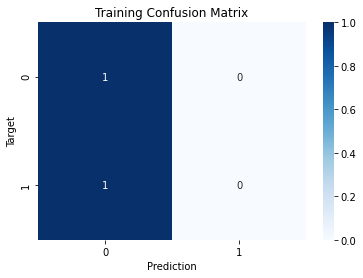

In [100]:
train_preds1 = predict_and_plot(tra_inputs1, tra_targets1, 'Training')

Confusion matrix for validation data 


Accuracy: 94.90%


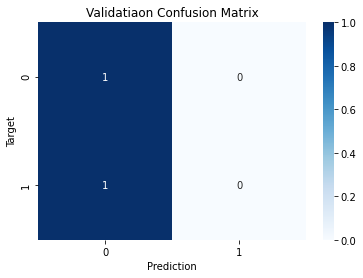

In [101]:
val_preds1 = predict_and_plot(val_inputs1, val_targets1, 'Validatiaon')

The accuracy of the model on the validation is 94.9%, which suggests that our model generalizes well to data it hasn't seen before. 

But how good is 94.9% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [102]:
import numpy as np
def random_guess(inputs):
    return np.random.choice([0,1], len(inputs))

In [103]:
def all_no(inputs):
    return np.full(len(inputs), 0)

Let's check the accuracies of these two models on the test set.

In [104]:
accuracy_score(val_targets1, random_guess(val_inputs1))

0.50513894175866

In [105]:
accuracy_score(val_targets1, all_no(val_inputs1))

0.9489912447658927

Our random model achieves an accuracy of 51.4% and our "always No" model achieves an accuracy of 94.89%. 

Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.



## Logistic Regression Classifier Model2
Input columns for training the model2

Location info will be represented solely by Longitude and Latitude. All other location info will be dropped.

In [106]:
# input and target columns for building the model
in_col2 = ['Latitude', 'Longitude','is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day', 'Species_CULEX ERRATICUS', 
             'Species_CULEX PIPIENS', 'Species_CULEX PIPIENS/RESTUANS','Species_CULEX RESTUANS', 'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS', 'Species_CULEX TERRITANS']
out_col2 = ['target']

In [107]:
# training input and target data set
tra_inputs2 = tra_df[in_col2].copy()
tra_targets2 = tra_df[out_col2].copy()

In [108]:
# validation input and target data set
val_inputs2 = val_df[in_col2].copy()
val_targets2 = val_df[out_col2].copy()

Training a Logistic Regression Model2

In [109]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear',random_state = 42)
model2.fit(tra_inputs2, tra_targets2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
print(model2.coef_.tolist())

[[-0.4700542956603167, -1.7655672973095091, 1.2135347173874562, -1.1738193626205433, -0.8108651596076114, 0.6375592358031703, 2.1744564927530075, 0.5271947044646816, -0.20217794689456675, 0.32789008925163404, -0.15803788764575838, -1.1914831582259078, -1.137004255293914, -0.11794032537210723, -1.7748862404469037]]


In [111]:
print(model2.intercept_)

[-4.25363972]


Making Predictions and Evaluating the Model1

We can now use the trained model to make predictions on the training, validation dataset

In [112]:
train_preds2 = model2.predict(tra_inputs2)
train_preds2

array([0, 0, 0, ..., 0, 0, 0])

In [113]:
train_probs2 = model2.predict_proba(tra_inputs2)
train_probs2

array([[0.9557558 , 0.0442442 ],
       [0.94571782, 0.05428218],
       [0.99220184, 0.00779816],
       ...,
       [0.93122904, 0.06877096],
       [0.92352453, 0.07647547],
       [0.92005282, 0.07994718]])

In [114]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def predict_and_plot(inputs, targets, name=''):
    preds = model2.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True, cmap = 'Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Confusion matrix for training data 

Accuracy: 94.71%


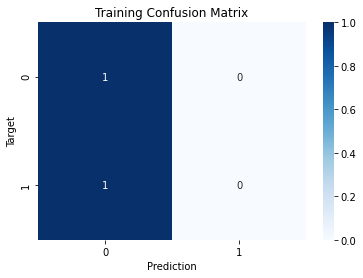

In [115]:
train_preds2 = predict_and_plot(tra_inputs2, tra_targets2, 'Training')

Confusion matrix for validation data 

Accuracy: 94.90%


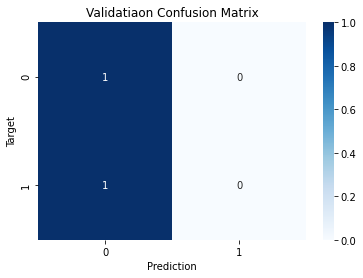

In [116]:
val_preds2 = predict_and_plot(val_inputs2, val_targets2, 'Validatiaon')

Model1 and Model2 have 94.9% accuracy which is very close to a dumb model which always gives 0 as a output.

Though models have 94.9% accuracy but confusion matrix shows that the probability of model1 and model2 predicting 'true negative' is close to 1 but for 'True Positive' is close to 0, which means it fails to detect the virus

This may be due to imbalance data used for training the model. 

In model3 traning data is balanced by using oversampling 


## Logistic Regression Classifier Model3 (Oversampling)

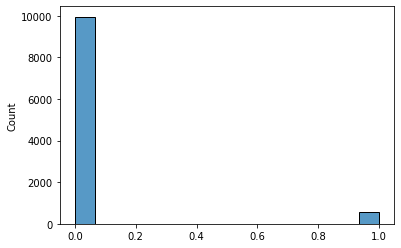

In [117]:
tag = final_data['target'].values
sns.histplot(tag)

Above histogram show that training data is highly imbalance where class '0' is close to 10000 and class '1' is close to 500 

Data is not balanced, we can use SMOTE - Synthetic Minority Oversampling Technique to balance out the data.

For that we need to import 'imblearn' library

In [118]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [119]:
inputs.columns

Index(['Block', 'Street', 'Trap', 'Latitude', 'Longitude', 'AddressAccuracy',
       'is_hot', 'is_dry', 'is_windy', 'Year', 'Month', 'Day',
       'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



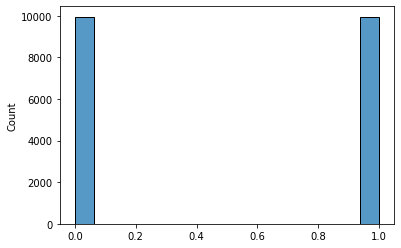

In [120]:
input_data1 = final_data[in_col1].copy()

smote = SMOTE()
x_smote ,y_smote = smote .fit_resample(input_data1, final_data['target'])
sns.histplot(y_smote)

Now both the classes are balanced to train the model

In [121]:
xs_train ,xs_test ,ys_train ,ys_test = train_test_split(x_smote ,y_smote , test_size = 0.25 , random_state = 42 ,shuffle = True) 

Accuracy: 72.92%


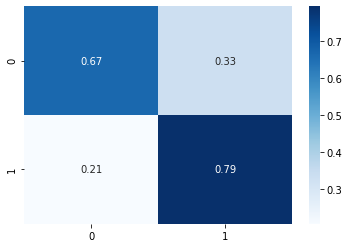

In [122]:
model3 = LogisticRegression(solver='liblinear',random_state = 42)
model3.fit(xs_train, ys_train)
ys_pred = model3.predict(xs_test)
accuracy = accuracy_score(ys_test, ys_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

cm = confusion_matrix(ys_test,ys_pred,normalize='true')
sns.heatmap(cm, annot=True, cmap = 'Blues')

Accuracy of model3 is 72.48 but it has probability of 0.78 to predict the 'True positive' and probability to predict the 'False negative' is 0.22, which is better than model1 and model2

## Random Forest Classifier Base Model

Let's create a base model with which we can compare models with tuned hyperparameters.

In [123]:
from sklearn.ensemble import RandomForestClassifier

base_model = RandomForestClassifier(n_jobs=-1, criterion = 'gini', random_state=42)

base_model.fit(xs_train, ys_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy of train data from base model

In [124]:
base_train_acc = base_model.score(xs_train, ys_train)

Accuracy of validation data from base model

In [125]:
base_val_acc = base_model.score(xs_test ,ys_test)

In [126]:
base_accs = base_train_acc, base_val_acc
base_accs

(0.981516206804179, 0.9568099638409)

In [127]:
train_probs = base_model.predict_proba(xs_train)
train_probs

array([[0.33660796, 0.66339204],
       [0.        , 1.        ],
       [0.1       , 0.9       ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.06      , 0.94      ]])

In [128]:
base_model.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

### Hyperparameter Tuning with Random Forests


#### 1) Estimators

In [ ]:
estim = []
Train_ac = []
Test_ac = []

for estimators in range(100, 801, 20):
    forest = RandomForestClassifier(n_estimators=estimators, criterion = 'gini', random_state = 42)
    forest.fit(xs_train, ys_train)
    train_acc = 1 - forest.score(xs_train, ys_train)
    val_acc = 1 - forest.score(xs_test ,ys_test)

    estim.append(estimators)
    Train_ac.append(train_acc)
    Test_ac.append(val_acc)

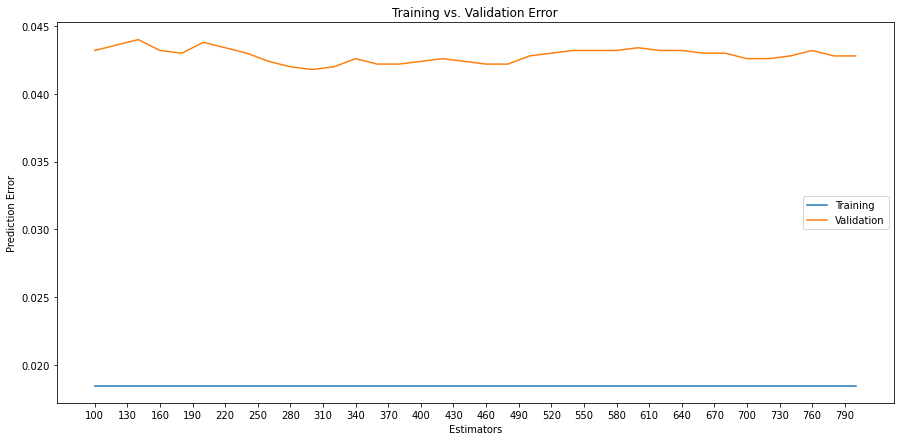

In [130]:
plt.figure(figsize=(15,7))
plt.plot(estim[:], Train_ac[:])
plt.plot(estim[:], Test_ac[:])
plt.title('Training vs. Validation Error')
plt.xticks(range(100,801, 30))
plt.xlabel('Estimators')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Validation'])

In [131]:
ind = Test_ac.index(min(Test_ac))
N = estim[ind]
N

300

The graph between training error and validation error shows that validation error is minimum at `n_estimators` = N

#### 2) Maximum depth
The optimal values of `max_depth` lies somewhere between 0 and unbounded.

In [132]:
Depth = []
Train_acc = []
Test_acc = []

for depth in range(5, 51, 5):
    forest1 = RandomForestClassifier(n_estimators=N, max_depth= depth, criterion = 'gini', random_state = 42)
    forest1.fit(xs_train, ys_train)
    train_acc = 1 - forest1.score(xs_train, ys_train)
    val_acc = 1 - forest1.score(xs_test ,ys_test)

    Depth.append(depth)
    Train_acc.append(train_acc)
    Test_acc.append(val_acc)

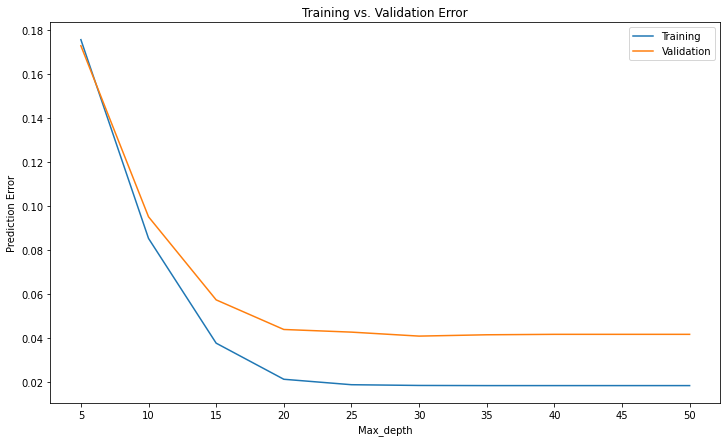

In [133]:
plt.figure(figsize=(12,7))
plt.plot(Depth[0:11], Train_acc[0:11])
plt.plot(Depth[0:11], Test_acc[0:11])
plt.title('Training vs. Validation Error')
plt.xticks(range(5,51, 5))
plt.xlabel('Max_depth')
plt.ylabel('Prediction Error')
plt.legend(['Training', 'Validation'])


The graph between training error and validation error shows that validation error is minimum at max_depth = 35

## Final Random Forests model with tuned hyperparameter 

* n_estimators = N
* max_depth = 35

In [134]:
forest_model = RandomForestClassifier(n_estimators = N, max_depth = 35, n_jobs=-1, criterion = 'gini', random_state=42)

forest_model.fit(xs_train, ys_train)

final_train_acc = forest_model.score(xs_train, ys_train)
final_val_acc = forest_model.score(xs_test ,ys_test)

final_accs = final_train_acc, final_val_acc
final_accs

(0.981516206804179, 0.9584170349537967)

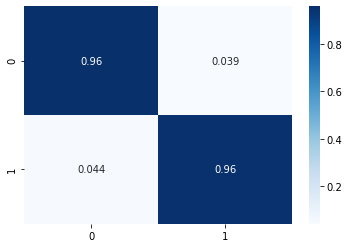

In [135]:
ys_pred_final = forest_model.predict(xs_test)
cm = confusion_matrix(ys_test,ys_pred_final, normalize='true')
sns.heatmap(cm, annot=True, cmap = 'Blues')

## Ensemble both models (logistic regress and Random Forests model)

ensemble both the models to predict the target for test set (X_test)

In [136]:
ensemble = [forest_model, model3]
pred_val = []
for model in ensemble:
    pred_val.append(model.predict_proba(X_test))
probs = sum(pred_val)/len(ensemble)
final_pred = [0 if p[0] > p[1] else 1 for p in probs]

In [137]:
predictions = pd.DataFrame(np.array(final_pred))

In [138]:
df = pd.concat([test_df['Id'], predictions], axis=1)

In [139]:
submission_df['WnvPresent'] = df[0]
submission_df

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
116288,116289,0
116289,116290,0
116290,116291,1
116291,116292,1


In [140]:
dups_color1 = submission_df.pivot_table(columns=['WnvPresent'], aggfunc='size')
print (dups_color1)

WnvPresent
0    108694
1      7599
dtype: int64


## Summary and References

The following topics were covered in this Project:

- Downloading a real-world dataset
- Preparing a dataset for training
- Training and interpreting logistic regression
- Training and interpreting random forests
- Balancing the data for training
- Overfitting, hyperparameter tuning & regularization
- Ensembling the models
- Making predictions on test data set

Check out the following resources to learn more: 

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://blog.mosquito.buzz/how-weather-affects-mosquito-activity
- https://www.kaggle.com/kobiyashimaru/west-nile-virus-basic-eda-with-maps
- https://www.kaggle.com/rajathmc/west-nile-virus-prediction

In [141]:
#submission_df.to_csv('sampleSubmission.csv',index=False)